In [38]:
# try other pretrained models (resnet, mobilenet)
# try less images and see how performance changes
# use raw classifications for a proxy metric to ok/defect
# code adapted from:
# Keras tutorial https://keras.io/guides/transfer_learning/
# Kaggle tutorial https://www.kaggle.com/code/digantdixit/transfer-learning-cnn-for-beginners


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras, os
from keras.layers import Conv2D, MaxPool2D,Dropout,Flatten,Dense
from keras.preprocessing import image 
from keras.models import Sequential

In [4]:
train_data_gen = image.ImageDataGenerator(rescale= 1./255, validation_split=0.2)
train = train_data_gen.flow_from_directory(directory="casting_512x512/" , target_size=(256,256) , batch_size=32, class_mode = 'binary', subset='training')
test = train_data_gen.flow_from_directory(directory="casting_512x512/" , target_size=(256,256) , batch_size=32, class_mode = 'binary', subset='validation')

Found 1041 images belonging to 2 classes.
Found 259 images belonging to 2 classes.


In [5]:
print(train.class_indices)
print(test.class_indices)

{'def_front': 0, 'ok_front': 1}
{'def_front': 0, 'ok_front': 1}


In [ ]:
list_split = [0.05,0.1,0.5,0.8]

train_data_gen = image.ImageDataGenerator(rescale= 1./255, validation_split=0.2)
train = train_data_gen.flow_from_directory(directory="casting_512x512/" , target_size=(256,256) , batch_size=32, class_mode = 'binary', subset='training')
test = train_data_gen.flow_from_directory(directory="casting_512x512/" , target_size=(256,256) , batch_size=32, class_mode = 'binary', subset='validation')

In [6]:
from tensorflow.keras.applications import Xception
xcept = Xception(input_shape = (256, 256, 3), include_top = False, weights = 'imagenet')
mobilenet = tf.keras.applications.MobileNet(input_shape=(256, 256, 3),include_top=True,weights="imagenet")
ResNet = tf.keras.applications.ResNet50(include_top=True,weights="imagenet",input_shape=(256, 256, 3))



2022-11-18 10:31:31.537159: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-18 10:31:31.537637: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-18 10:31:31.538051: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-11-18 10:31:31.538345: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-11-18 10:31:31.538622: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

83683744/83683744 [==============================] - 7s 0us/step


In [43]:
### OTHER CODE, FROM KAGGLE
#for layer in xcept.layers:
#    layer.trainable = False
#model=keras.Sequential([
#    xcept,
#    keras.layers.Flatten(),
#    keras.layers.Dense(units=256, activation="relu"),
#    keras.layers.Dropout(0.2),
#    keras.layers.Dense(units=1, activation="sigmoid"),
#])

#model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
## Adapted from Keras transfer learning tutorial
xcept.trainable = False
inputs = keras.Input(shape=(256, 256, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. 
x = xcept(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [45]:
print(model.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d_4   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 20,863,529
Trainable params: 2,049
Non-trainable params: 20,861,480
_________________________________________________________________
None


In [46]:
model.fit(train,epochs=10,steps_per_epoch=7,validation_data=test,validation_steps=len(test))

Epoch 1/10
7/7 [==============================] - 33s 5s/step - loss: 0.8132 - accuracy: 0.5223 - val_loss: 0.6944 - val_accuracy: 0.6023
Epoch 2/10
7/7 [==============================] - 34s 5s/step - loss: 0.7368 - accuracy: 0.5670 - val_loss: 0.6386 - val_accuracy: 0.6023
Epoch 3/10
7/7 [==============================] - 34s 5s/step - loss: 0.6130 - accuracy: 0.5804 - val_loss: 0.5919 - val_accuracy: 0.6216
Epoch 4/10
7/7 [==============================] - 32s 5s/step - loss: 0.5857 - accuracy: 0.6507 - val_loss: 0.5550 - val_accuracy: 0.6371
Epoch 5/10
7/7 [==============================] - 35s 5s/step - loss: 0.5491 - accuracy: 0.6205 - val_loss: 0.5436 - val_accuracy: 0.6139
Epoch 6/10
7/7 [==============================] - 37s 6s/step - loss: 0.5188 - accuracy: 0.6652 - val_loss: 0.5187 - val_accuracy: 0.7259
Epoch 7/10
7/7 [==============================] - 36s 5s/step - loss: 0.5265 - accuracy: 0.7177 - val_loss: 0.5055 - val_accuracy: 0.7413
Epoch 8/10
7/7 [==================

In [47]:
print(model.history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


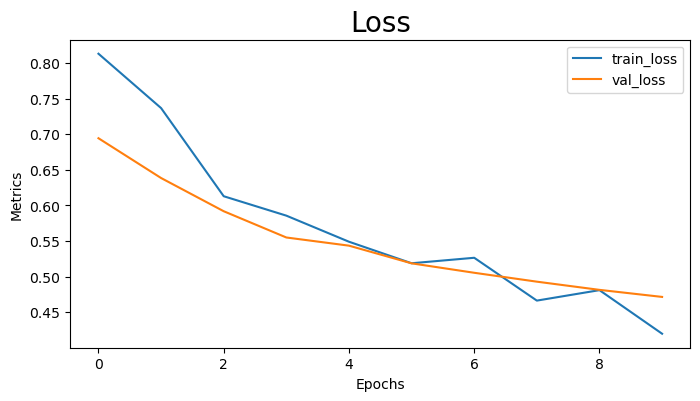

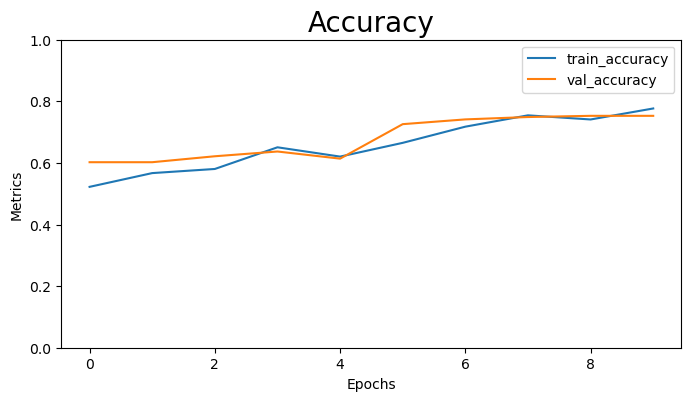

In [48]:
# plot loss
plt.subplots(figsize = (8, 4))
X = range(1, 1+len(model.history.epoch))
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Loss", fontsize = 20)
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.legend(labels = ['train_loss', 'val_loss'])
plt.show()

# plot accuracy
plt.subplots(figsize = (8, 4))
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Accuracy", fontsize = 20)
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.ylim(0,1)
plt.legend(labels = ['train_accuracy', 'val_accuracy'])
plt.show()

In [49]:
#### To finish - predict on all images to see what comes out
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
import numpy as np

model = Xception(input_shape = (299, 299, 3), weights='imagenet')

img_path = 'casting_512x512/ok_front/cast_ok_0_1018.jpeg'
#img_path = 'casting_512x512/def_front/cast_def_0_0.jpeg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 498ms/step
Predicted: [('n03843555', 'oil_filter', 0.31126547), ('n04553703', 'washbasin', 0.22433704), ('n04019541', 'puck', 0.09062061)]
